<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Supervised_Learning/Linear%20Regression/Refined_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Implementation
## Introduction
Linear regression is a model which uses a trained line to predict the value of something based on two parameters. The model is trained to form a straight line which results in the least amount of errors between the example data points and the line of best fit. The data is all of the same type - this is not a classification problem. In this example, we will use the penguin data set with only the species "Adelie" and its parameters of bill length and depth.

## Imports, Data Loading, Data Visualization
This section of code shows a plot of the Adelie penguin bill length vs. bill depth, which as expected has a generally positive trend upon inspection. Therefore, we would expect a successful implementation of linear regression to show us a positive trending line placed somewhere around the middle of the data depicted.

Saving palmer_penguins.csv to palmer_penguins (1).csv


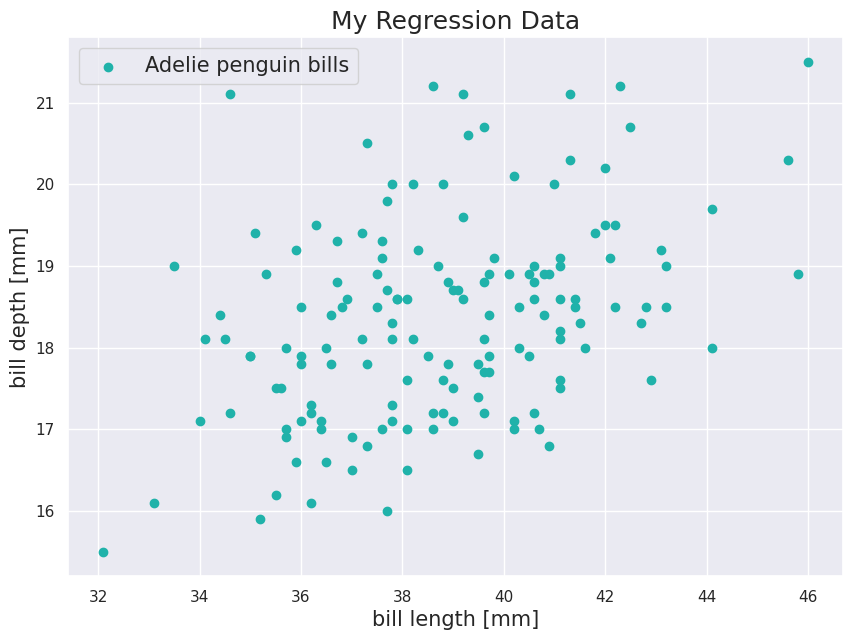

In [ ]:
#This is referenced/build from lecture 4.2 of Dr. Davila's github
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#The two lines are to make sure the code can find the file we want to work with
#This prompts colab to ask me to choose a file from my desktop
#I want to use the penguin dataset instead of the flower petals one, called palmer_penguins.csv
#when implementing in github, may need to upload data set and reference correctly in code
from google.colab import files
uploaded = files.upload()

sns.set_theme()

# df = pd.read_csv("Datasets/iris_dataset.csv")
df = pd.read_csv("palmer_penguins.csv")
# below, only using first 151 rows because that's the adelie species, there are more
df = df.iloc[:151][["bill_length_mm", "bill_depth_mm"]]
plt.figure(figsize = (10, 7))
plt.scatter(df.bill_length_mm,
            df.bill_depth_mm,
            color = "lightseagreen",
            label = "Adelie penguin bills")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

This is a class for a single neuron, description is included below (referenced from Dr. Davila's github lecture 4.2)

In [ ]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron.

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias.
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration
        of stochastic gradient descent per epoch.

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data
        used consists of feature vectors X and associated labels y.

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the
        activation_function to make a y_hat prediction on each feature vector.
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]
        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

Now, the data is cleaned to avoid NaN rows and the data is shown again.

0
0


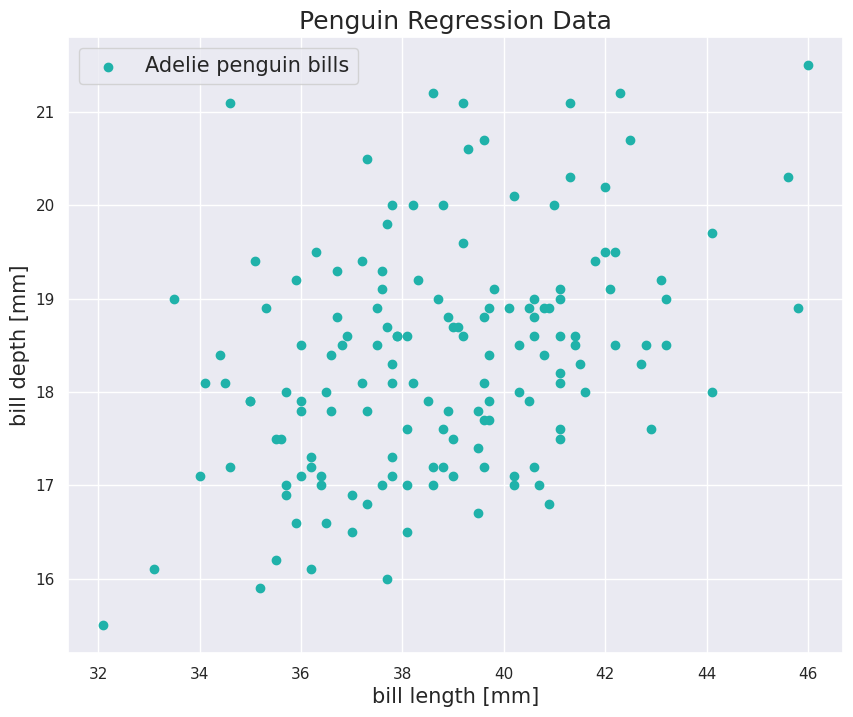

In [ ]:
# Remove rows with nan values in either X or y
df_clean = df.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

# Extract the cleaned data for X and y
X = df_clean['bill_length_mm'].values
y = df_clean['bill_depth_mm'].values
X = X.reshape(-1, 1)


#X = df.bill_length_mm.values
#X = X.reshape(-1, 1)
#y = df.bill_depth_mm.values

print(np.isnan(X).sum())  # This checks for nan values in X
print(np.isnan(y).sum())  # This checks for nan values in y


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Adelie penguin bills")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Penguin Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

## Train the Linear Regression Model
Next, we define a linear activation and train the single neuron model based on the data plotted above. The trained representation can be seen in the diagonal blue line in the following plot, which is trending positive as we expected- increasing bill length is correlated to increasing bill depth.

In [ ]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 10)

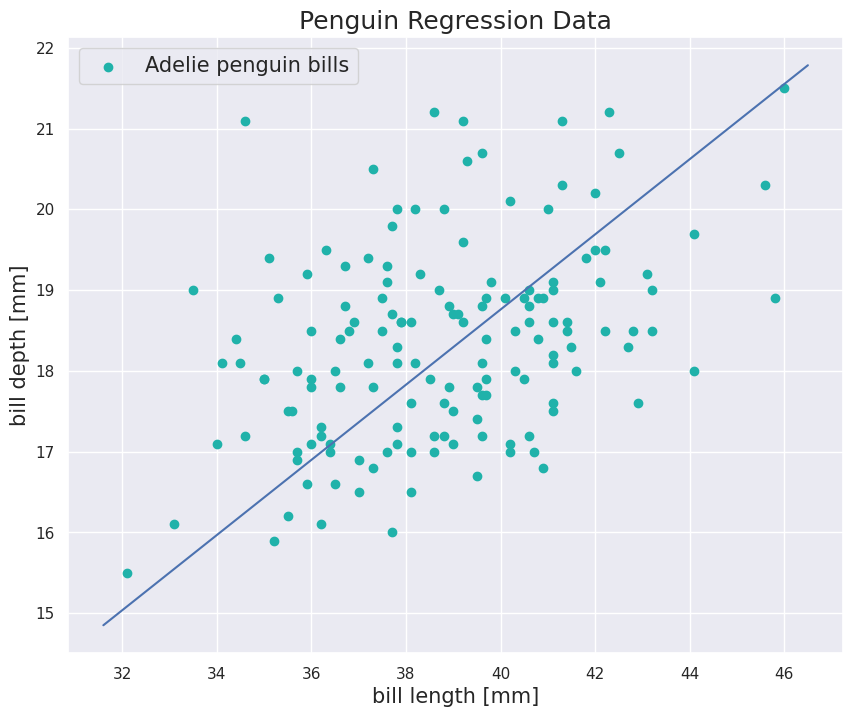

In [ ]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)
#domain = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)
#domain_reshaped = domain.reshape(-1, 1)  # Ensure domain is reshaped as 2D input for prediction

# Predict using the trained model
#y_pred = node.predict(domain_reshaped)
#print(y_pred)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Adelie penguin bills")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Penguin Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

## Analyzing Training
To get an idea of how the model performed, the plot below shows the error computed at each epoch as it learned the data. Luckily, it decreased quickly and then stayed low!

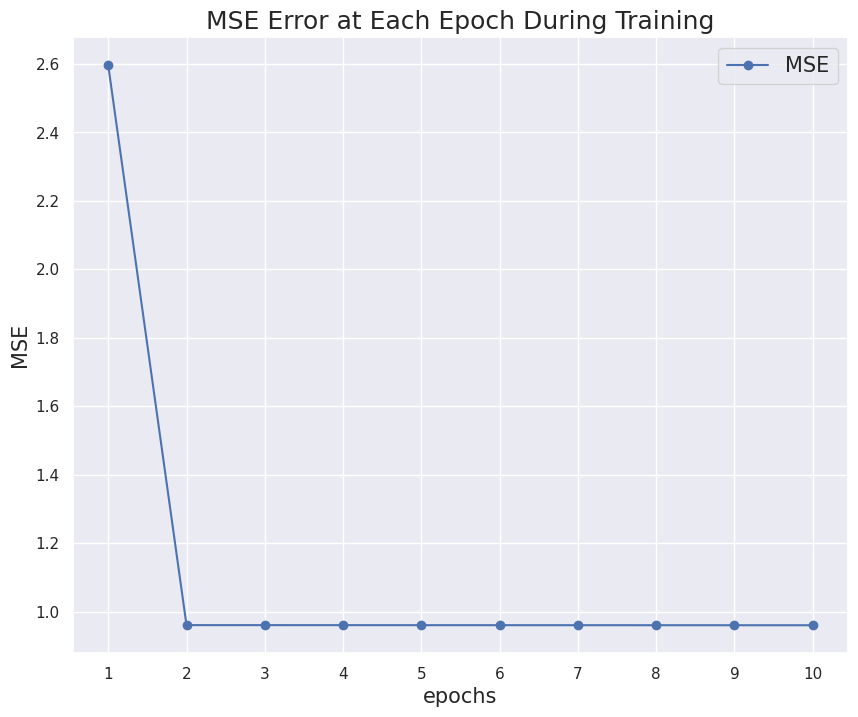

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1),
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

The following plot shows the MSE error and the regression line from our model next to each other.

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

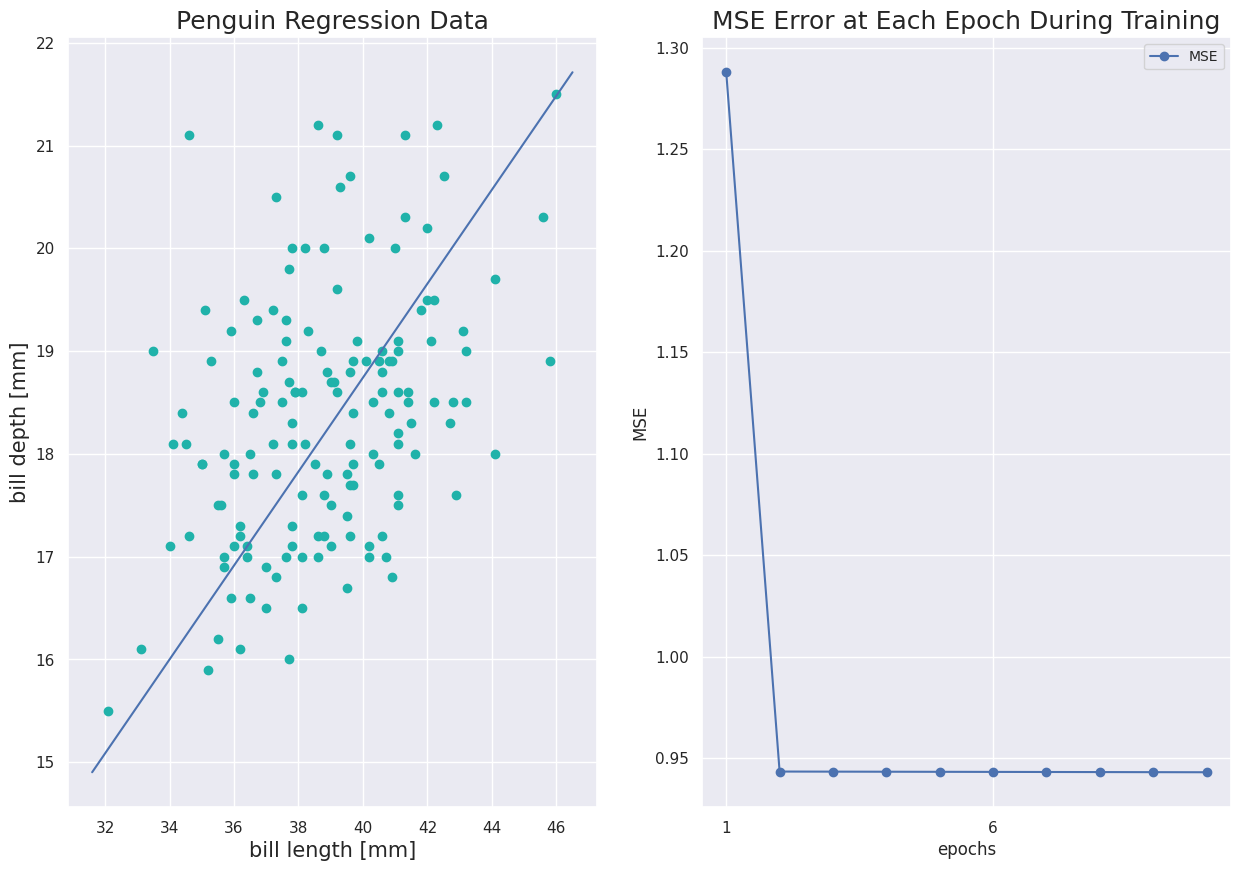

In [ ]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.set_title("Penguin Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1),
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

## Testing Various Learning Rates
Finally, to gain a bit more insight into how the model learns, we can test out different alpha values (learning rates) to see how they impact the results differently. The plot below indicates that for this example, a higher learning rate may be less accurate.

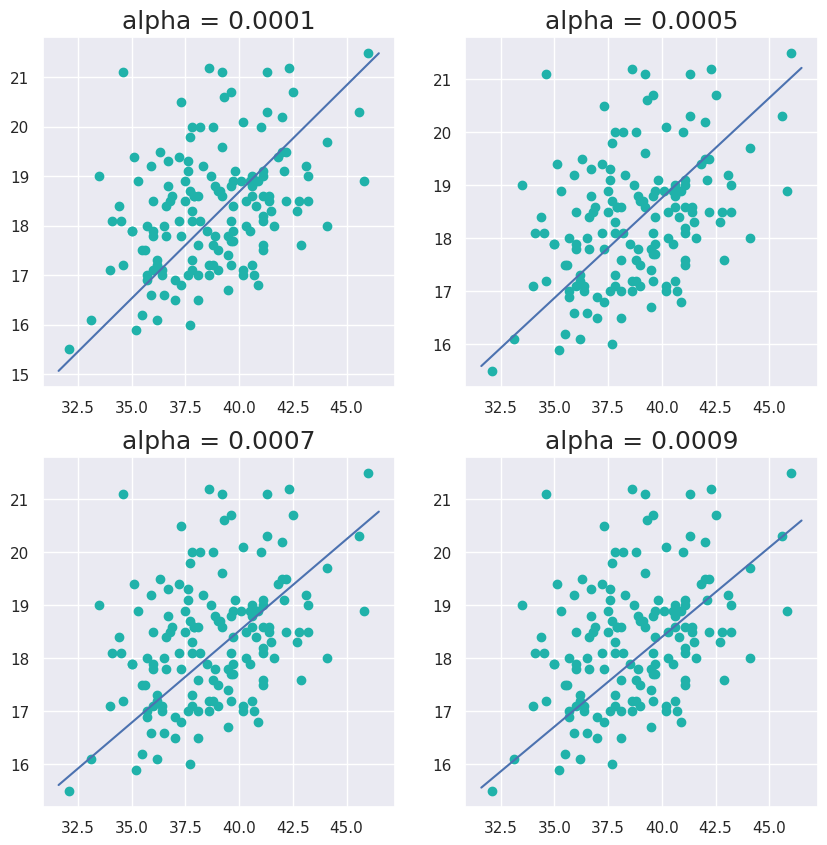

In [ ]:
# Possible choices of learning rate
alphas = [0.0001, 0.0005, 0.0007, 0.0009]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

To conclude, linear regression is a useful way to create a general trendline of one type of data based on a few parameters. This would not apply to non-linear relationships, and has limitations in accuracy depending on how much noise the data has. The learning rate (alpha) and time spent training (epochs) also impact the accuracy of the model. In other algorithms, we will test how to make a regression model work when the data is not linear!